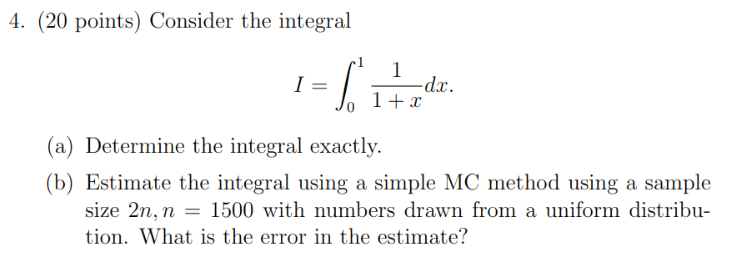
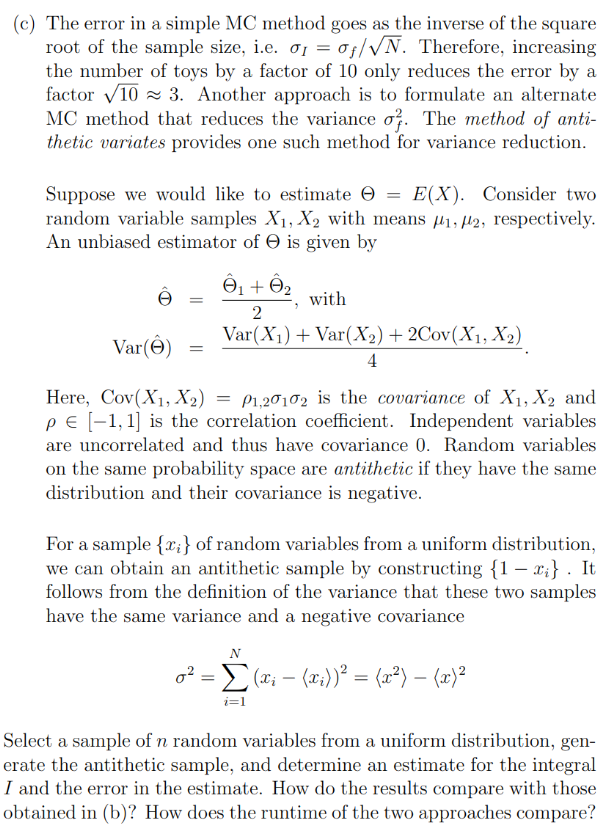
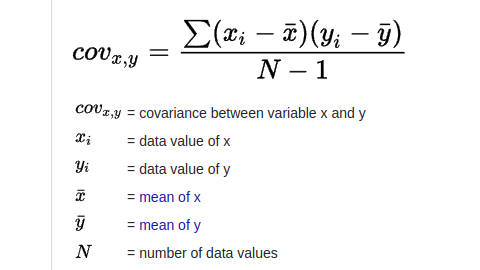

In [9]:
import numpy as np
import time

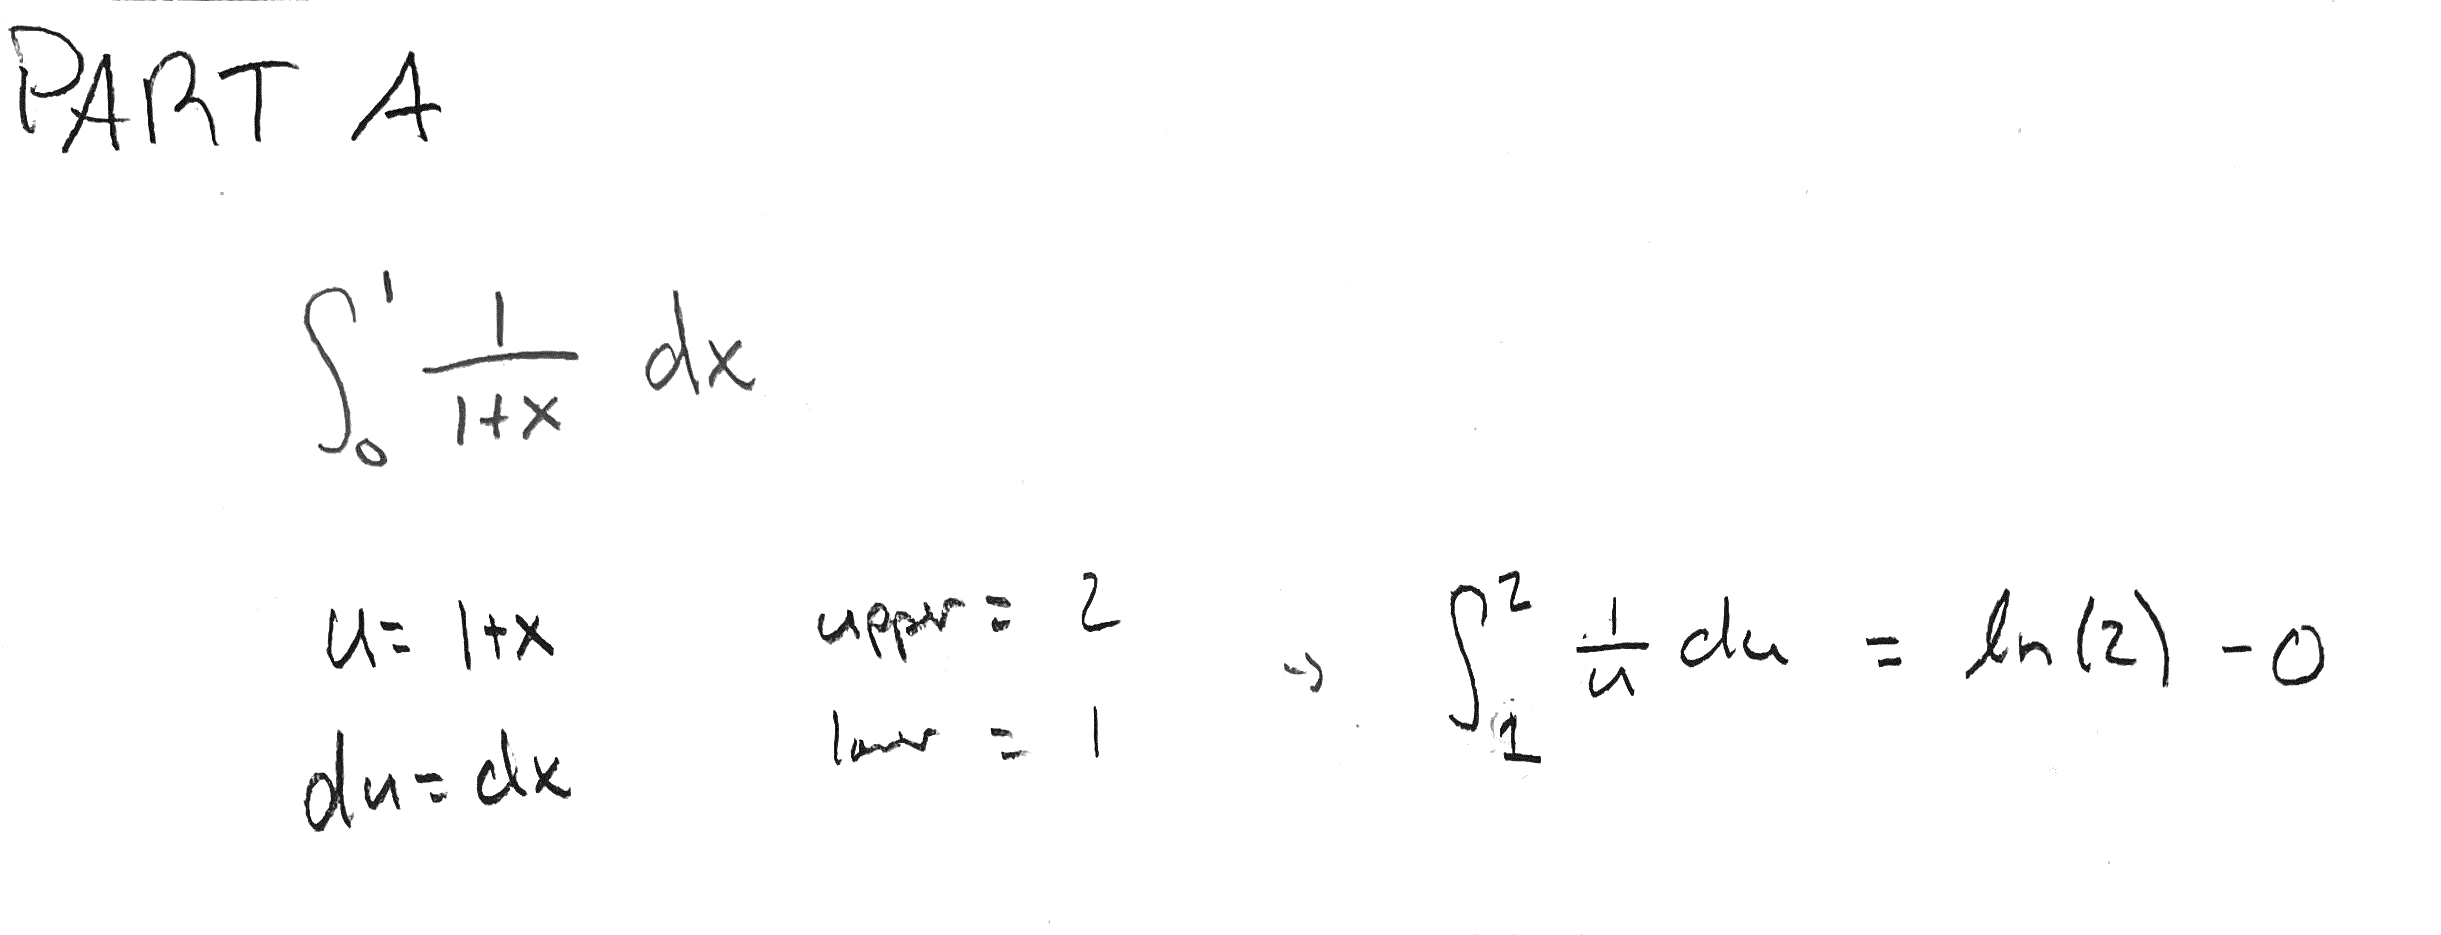

In [39]:
    
def func(x):
    return 1/(1+x) #choose function here

#PART B

t0 = time.time()

n=1500
a=0
b=1
xrand = np.random.uniform(a,b,2*n)

calc = (b-a)/(2*n) * np.sum(func(xrand)) #integral, average area of rectangles of random points on f
tf = time.time()

#ACTUAL
act = np.log(2)

print(f'Monte Integral = {calc}')
print(f'Actual Integral = ln(2) = {act}')
print(f'Error = {np.std(func(xrand))/np.sqrt(2*n)}') #std(integral) = std(func(xrandoms))/sqrt(N)
print(f'Run Time: {tf-t0}')

#PART C
#https://ocw.mit.edu/courses/15-450-analytics-of-finance-fall-2010/4fa033082ff5ee58722a67fe81f0dce7_MIT15_450F10_lec03.pdf

t1 = time.time()
X1 = np.random.uniform(a,b,n)
X2 = 1-X1 #antithetic sample, so the cov is negative and thus the var in F is reduced
#X1 and X2 are corrrelated and have a negative covarience 

#find covariances
cov = np.sum((X1-np.mean(X1))*(X2-np.mean(X2)))/n

F1 = func(X1)
F2 = func(X2)

cov2 = np.sum((F1-np.mean(F1))*(F2-np.mean(F2)))/n
F = (F1+F2)/2

integral = (b-a)/n * np.sum(F) #F is average of of func evaluated at X and antithetic X
t2 = time.time()

varT = np.sqrt((np.var(F1)+np.var(F2)+2*cov2)/4)
varI = varT/n
print('')
print(f'Integral Method of Antivariates: {integral}')
print(f'What I think Error is: {np.std(F)/np.sqrt(n) :.20f}') #std(integral) = std(F)/sqrt(N)
print(f'Error from Eq in HW: {np.sqrt((np.var(X1)+np.var(X2)+2*cov)/4)}') #var F?
print(f'Error from Eq in HW but X becomes func(X): {np.sqrt(varI)}')
print(f'Run Time for RE: {t2-t1}')




Monte Integral = 0.6955609140706306
Actual Integral = ln(2) = 0.6931471805599453
Error = 0.002539613515982804
Run Time: 0.001836538314819336

Integral Method of Antivariates: 0.6928012835084176
What I think Error is: 0.00061111972178139358
Error from Eq in HW: 0.0
Error from Eq in HW but X becomes func(X): 0.00397228440153207
Run Time for RE: 0.002717733383178711


In [6]:
#EXPLANATIONS
#anithetic has roughly the same actaul integral, but small error and uses less points
#anithetic seems to be running faster, it using twice as less points
#if it was same points then it would be slower
#less points and smaller error is very nice!